In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pickle

In [2]:
ds=pd.read_csv('EV_dataset.csv')

In [3]:
ds.head()

,Acceleration (%),Battery Capacity (kWh),Energy Efficiency (km/kWh),Weight of Vehicle (kg),Range (km)
0,38.368472,72,3.000000,1317,216.000000
1,42.616358,48,3.622252,2224,173.868109
2,56.124811,74,4.030531,1856,298.259269
3,87.038722,88,3.257210,2390,286.634496
4,45.927590,85,4.615064,1640,392.280421


In [4]:
ds.size

101000

In [5]:
ds.shape

(20200, 5)

In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20200 entries, 0 to 20199
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Acceleration (%)            19797 non-null  float64
 1   Battery Capacity (kWh)      20200 non-null  int64  
 2   Energy Efficiency (km/kWh)  19797 non-null  float64
 3   Weight of Vehicle (kg)      20200 non-null  int64  
 4   Range (km)                  20200 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 789.2 KB


In [7]:
ds.isna().sum()

Acceleration (%)              403
Battery Capacity (kWh)          0
Energy Efficiency (km/kWh)    403
Weight of Vehicle (kg)          0
Range (km)                      0
dtype: int64

In [8]:
ds.describe()

,Acceleration (%),Battery Capacity (kWh),Energy Efficiency (km/kWh),Weight of Vehicle (kg),Range (km)
count,19797.000000,20200.000000,19797.000000,20200.000000,20200.000000
mean,66.633019,71.690446,3.863068,1845.771436,272.316437
std,19.238515,22.658424,0.977887,376.126534,94.921744
min,33.334109,40.000000,1.000280,1200.000000,120.000000
25%,49.977867,55.000000,3.000000,1518.000000,201.000000
50%,66.644683,70.000000,3.631866,1843.000000,258.000000
75%,83.310122,86.000000,4.655924,2170.000000,327.755073
max,99.994988,199.000000,6.297134,2499.000000,616.814984


In [9]:
ds.duplicated().sum()

np.int64(200)

In [10]:
ds.drop_duplicates(inplace=True)

In [11]:
ds.describe()

,Acceleration (%),Battery Capacity (kWh),Energy Efficiency (km/kWh),Weight of Vehicle (kg),Range (km)
count,19600.000000,20000.000000,19600.000000,20000.000000,20000.000000
mean,66.608235,71.706500,3.862498,1845.615250,272.314924
std,19.241704,22.669986,0.978259,376.217334,94.905711
min,33.334109,40.000000,1.000280,1200.000000,120.000000
25%,49.918644,55.000000,3.000000,1518.000000,201.000000
50%,66.592794,70.000000,3.629267,1843.000000,258.000000
75%,83.282114,86.000000,4.656553,2169.000000,327.474050
max,99.994988,199.000000,6.297134,2499.000000,616.814984


In [12]:
ds.dropna(inplace=True)

In [13]:
ds.head()

,Acceleration (%),Battery Capacity (kWh),Energy Efficiency (km/kWh),Weight of Vehicle (kg),Range (km)
0,38.368472,72,3.000000,1317,216.000000
1,42.616358,48,3.622252,2224,173.868109
2,56.124811,74,4.030531,1856,298.259269
3,87.038722,88,3.257210,2390,286.634496
4,45.927590,85,4.615064,1640,392.280421


In [14]:
ds=ds.round(2)

In [15]:
ds.head()

,Acceleration (%),Battery Capacity (kWh),Energy Efficiency (km/kWh),Weight of Vehicle (kg),Range (km)
0,38.37,72,3.00,1317,216.00
1,42.62,48,3.62,2224,173.87
2,56.12,74,4.03,1856,298.26
3,87.04,88,3.26,2390,286.63
4,45.93,85,4.62,1640,392.28


In [16]:
ds.mean()

Acceleration (%)                66.608236
Battery Capacity (kWh)          71.685561
Energy Efficiency (km/kWh)       3.862495
Weight of Vehicle (kg)        1845.276276
Range (km)                     272.221927
dtype: float64

In [17]:
ds.median()

Acceleration (%)                66.59
Battery Capacity (kWh)          70.00
Energy Efficiency (km/kWh)       3.63
Weight of Vehicle (kg)        1842.00
Range (km)                     258.00
dtype: float64

In [ ]:
ds.describe()

,Acceleration (%),Battery Capacity (kWh),Energy Efficiency (km/kWh),Weight of Vehicle (kg),Range (km)
count,19600.000000,19600.000000,19600.000000,19600.000000,19600.000000
mean,66.608236,71.685561,3.862495,1845.276276,272.221927
std,19.241697,22.628160,0.978246,376.208360,94.932924
min,33.330000,40.000000,1.000000,1200.000000,120.000000
25%,49.920000,55.000000,3.000000,1518.000000,201.000000
50%,66.590000,70.000000,3.630000,1842.000000,258.000000
75%,83.282500,86.000000,4.660000,2169.000000,327.280000
max,99.990000,199.000000,6.300000,2499.000000,616.810000


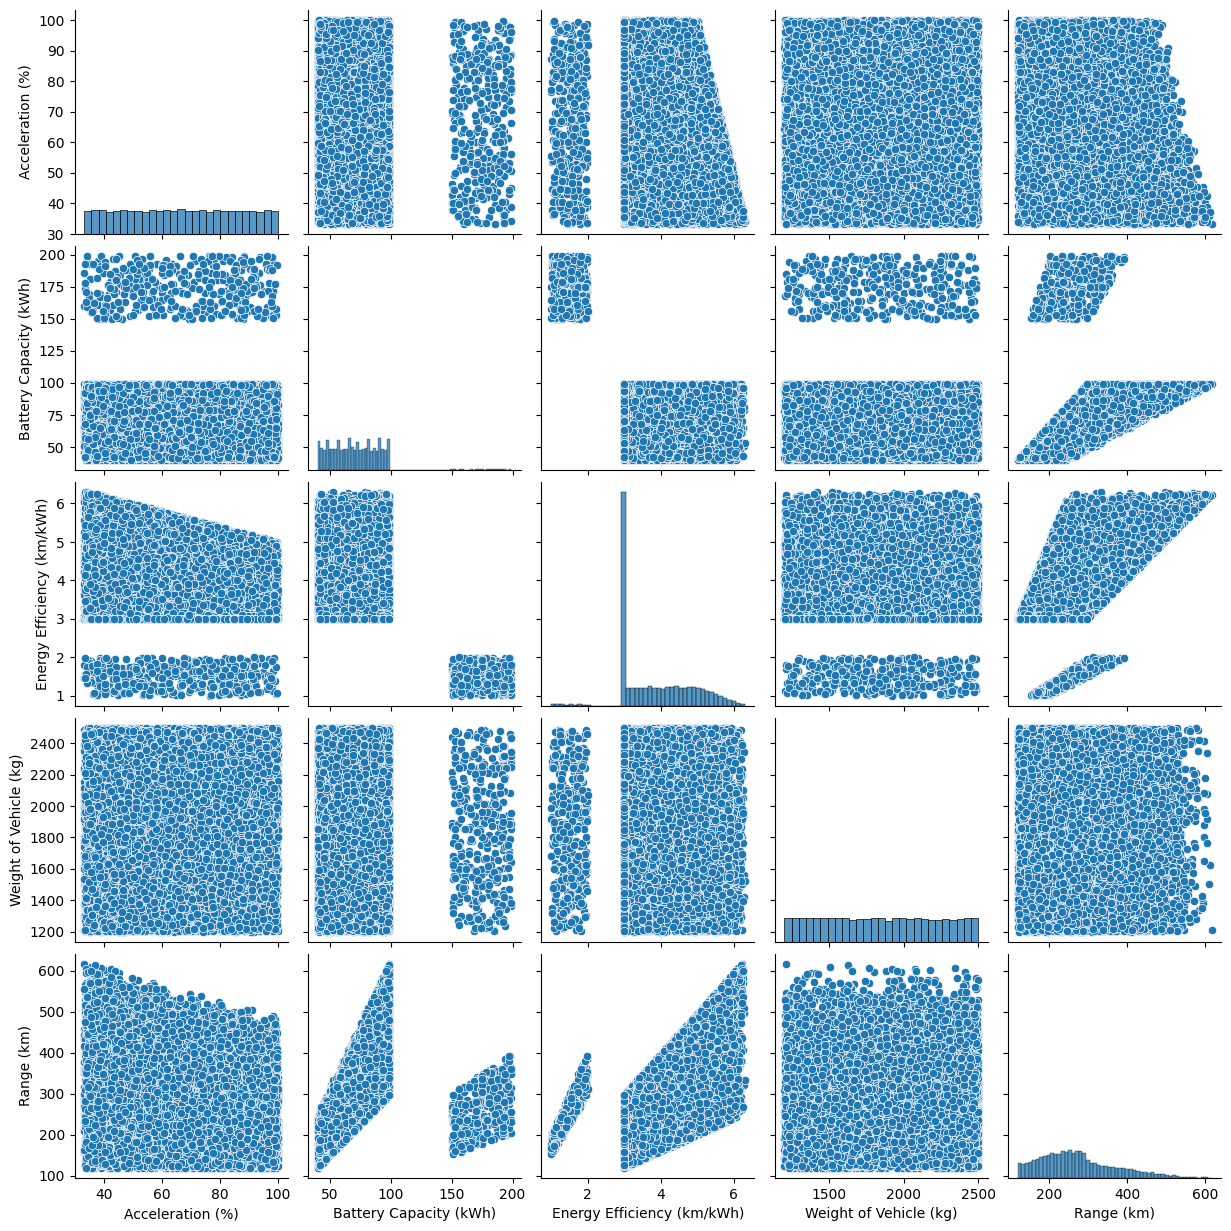

In [18]:
sns.pairplot(ds)

In [19]:
ds['Battery Capacity (kWh)'].value_counts()

Battery Capacity (kWh)
69     357
80     353
44     350
52     350
68     347
      ... 
167      4
162      4
154      4
168      4
194      3
Name: count, Length: 110, dtype: int64

<Axes: ylabel='Battery Capacity (kWh)'>

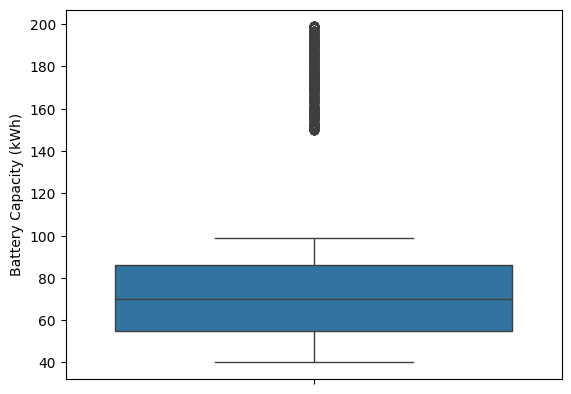

In [20]:
sns.boxplot(ds['Battery Capacity (kWh)'])

<Axes: xlabel='Battery Capacity (kWh)', ylabel='Density'>

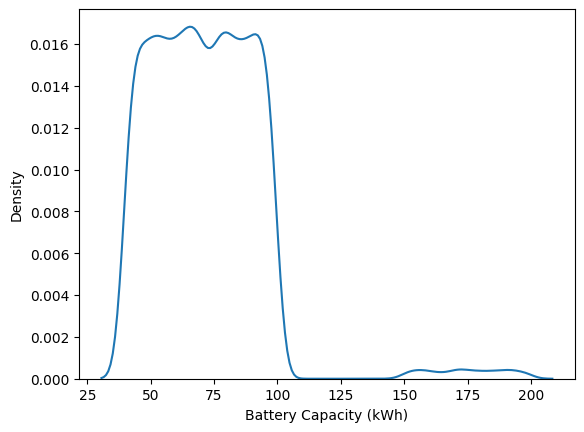

In [21]:
sns.kdeplot(ds['Battery Capacity (kWh)'])

In [22]:
#print(ds['Battery Capacity (kWh)'])
mean = np.mean(ds['Battery Capacity (kWh)'])
print(f'Mean == {mean}')

std = np.std(ds['Battery Capacity (kWh)'])
print(f'Std == {std}')

threshold = 3
outliers_list = []

for x_val in ds['Battery Capacity (kWh)']:
    z_score = (x_val-mean)/std
    z_score = np.abs(z_score)
    #print(f'{x_val} >> {z_score}')

    if z_score > threshold:
        outliers_list.append(x_val)

print('Outliers are :', outliers_list)

Mean == 71.6855612244898
Std == 22.627582853841815
Outliers are : [191, 197, 189, 186, 192, 181, 158, 171, 186, 193, 186, 169, 189, 150, 194, 176, 172, 172, 163, 157, 151, 181, 173, 198, 150, 197, 172, 175, 155, 157, 160, 150, 159, 163, 196, 159, 192, 171, 160, 191, 188, 196, 162, 171, 154, 167, 152, 163, 158, 198, 151, 175, 170, 187, 169, 184, 199, 157, 193, 165, 184, 172, 195, 162, 192, 165, 181, 170, 195, 151, 197, 156, 180, 185, 161, 178, 150, 152, 171, 187, 186, 150, 175, 160, 178, 192, 169, 196, 178, 192, 181, 173, 172, 154, 155, 193, 157, 172, 152, 193, 182, 162, 199, 155, 191, 195, 190, 155, 156, 177, 199, 166, 153, 186, 184, 153, 164, 199, 158, 198, 175, 187, 199, 150, 179, 168, 191, 151, 157, 191, 172, 170, 181, 161, 156, 177, 160, 184, 192, 182, 167, 157, 188, 160, 170, 193, 198, 176, 184, 198, 168, 165, 170, 166, 177, 158, 172, 179, 179, 172, 151, 170, 193, 180, 183, 175, 186, 171, 164, 159, 153, 180, 154, 157, 160, 150, 189, 186, 161, 158, 195, 174, 187, 185, 189, 181, 153

In [23]:
len(outliers_list)

389

In [24]:
def impute_outliers(feature):
    q1 = feature.quantile(0.25)
    q2 = feature.quantile(0.5)
    q3 = feature.quantile(0.75)

    print('Q1 == ', q1)
    print('Q2 == ', q2)
    print('Q3 == ', q3)

    iqr = q3 - q1 #IQR >> Inter Quartile Range
    print('IQR == ', iqr)

    upper_tail = q3 + 1.5* iqr
    lower_tail = q1 - 1.5* iqr

    print('Upper Tail == ', upper_tail)
    print('Lower Tail == ', lower_tail)

    # feature.loc[feature > upper_tail] = upper_tail
    # feature.loc[feature < lower_tail] = lower_tail
    return upper_tail, lower_tail

upper_tail, lower_tail = impute_outliers(ds['Battery Capacity (kWh)'])

Q1 ==  55.0
Q2 ==  70.0
Q3 ==  86.0
IQR ==  31.0
Upper Tail ==  132.5
Lower Tail ==  8.5


In [25]:
ds1 = ds.copy()

In [26]:
ds1['Battery Capacity (kWh)'] = np.where(ds1['Battery Capacity (kWh)'] > upper_tail, upper_tail,
                     np.where(ds1['Battery Capacity (kWh)']< lower_tail, lower_tail, ds1['Battery Capacity (kWh)']))

<Axes: ylabel='Battery Capacity (kWh)'>

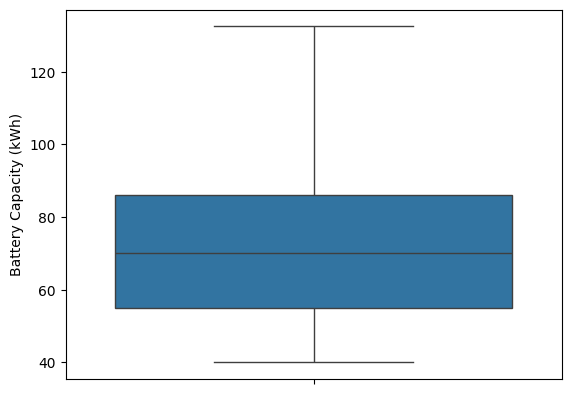

In [27]:
sns.boxplot(ds1['Battery Capacity (kWh)'])

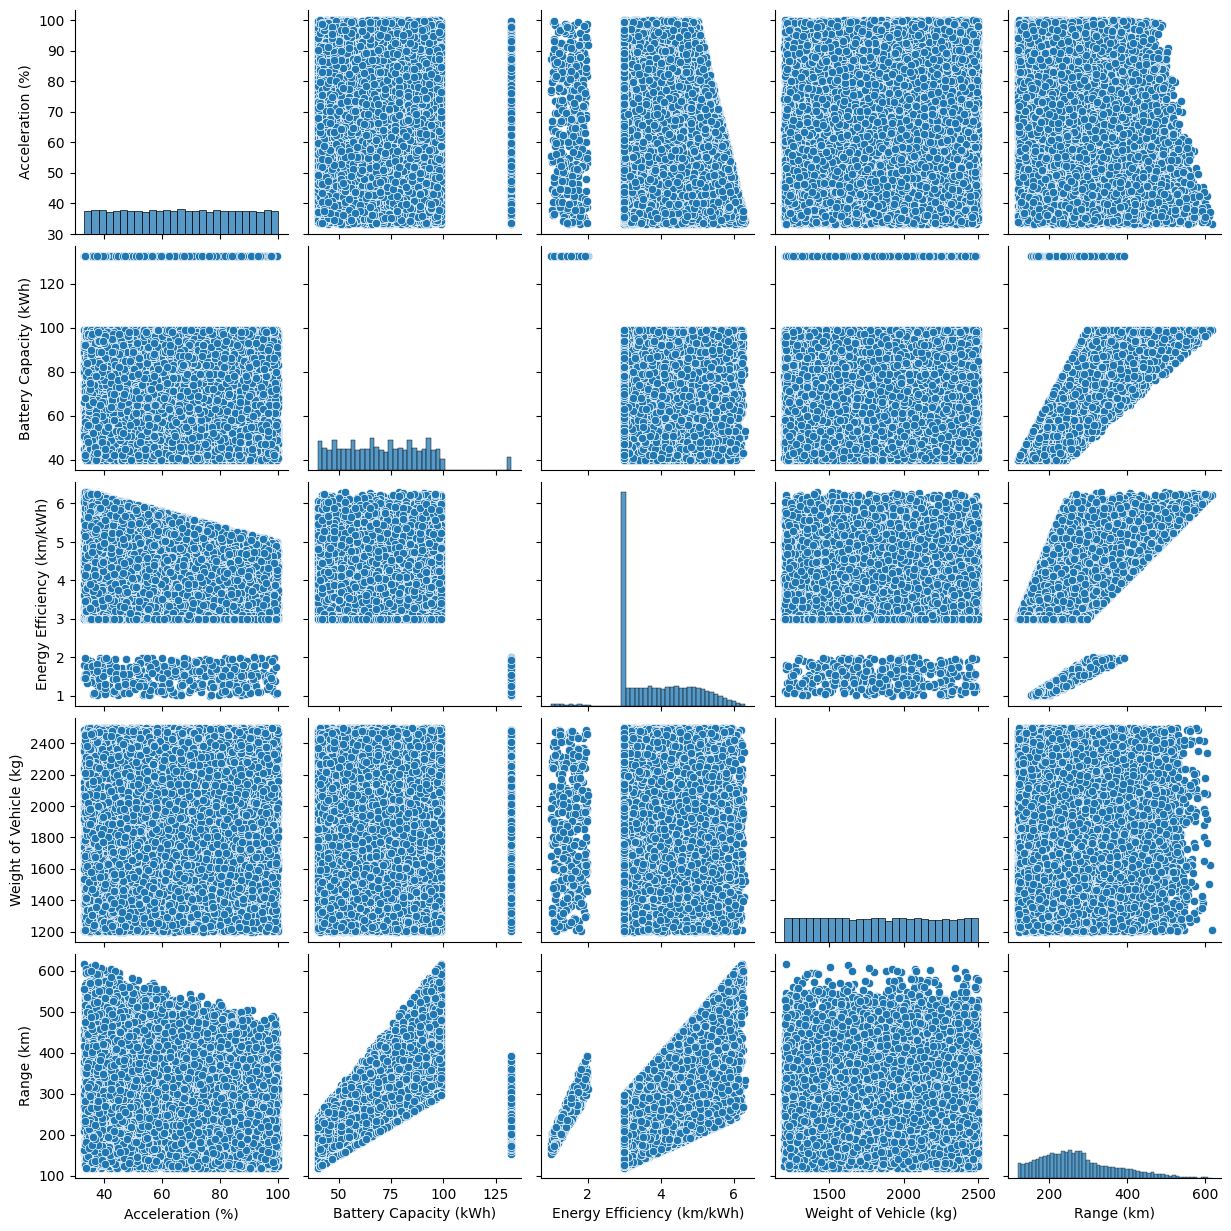

In [ ]:
sns.pairplot(ds1)

<Axes: ylabel='Energy Efficiency (km/kWh)'>

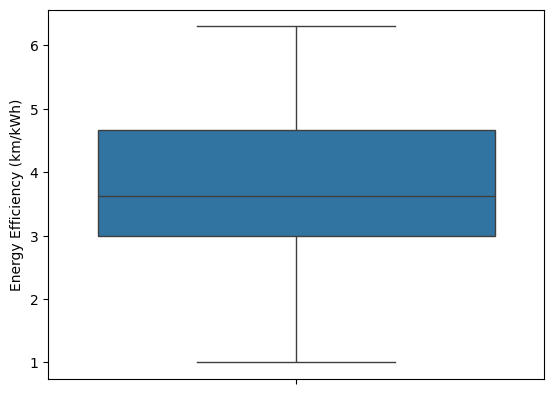

In [28]:
sns.boxplot(ds['Energy Efficiency (km/kWh)'])

<Axes: ylabel='Range (km)'>

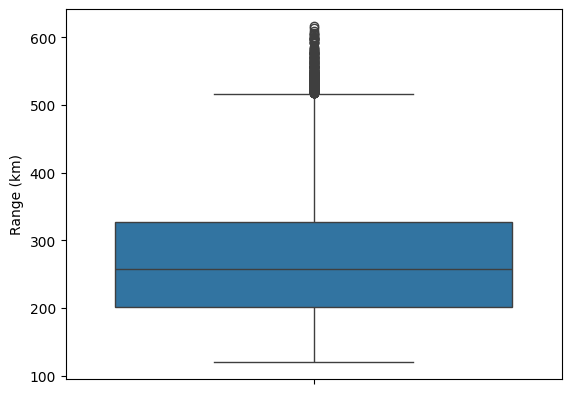

In [29]:
sns.boxplot(ds['Range (km)'])

<Axes: xlabel='Range (km)', ylabel='Density'>

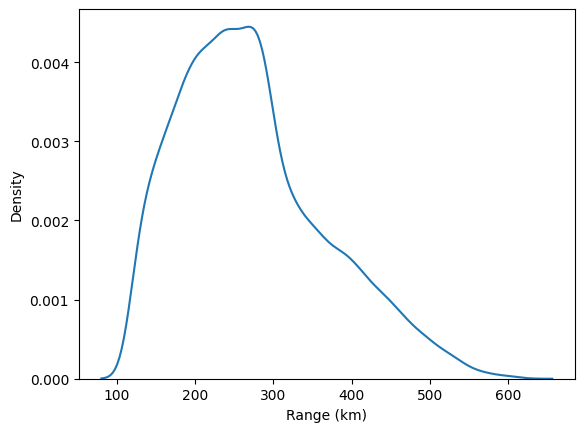

In [30]:
sns.kdeplot(ds['Range (km)'])

In [31]:
mean = np.mean(ds1['Range (km)'])
print(f'Mean == {mean}')

std = np.std(ds1['Range (km)'])
print(f'Std == {std}')

threshold = 3
outliers_list = []

for x_val in ds1['Range (km)']:
    z_score = (x_val-mean)/std
    z_score = np.abs(z_score)
    #print(f'{x_val} >> {z_score}')

    if z_score > threshold:
        outliers_list.append(x_val)

print('Outliers are :', outliers_list)

Mean == 272.2219265306123
Std == 94.93050265359385
Outliers are : [570.9, 597.4, 569.27, 584.91, 596.8, 564.78, 564.27, 593.83, 581.35, 601.06, 577.99, 573.89, 566.37, 605.55, 582.46, 562.55, 604.99, 616.81, 568.25, 577.62, 577.22, 598.07, 576.3, 575.45, 605.91, 598.21, 609.35, 558.82, 614.05, 577.23, 565.79, 598.65, 562.73, 571.45, 604.18, 579.89, 575.55, 565.05, 560.45, 564.0, 577.36, 571.4, 565.78, 569.02, 575.34, 557.99, 570.57, 562.45, 579.77, 582.43, 563.35, 557.84, 569.33, 585.58, 593.58, 591.78, 597.06, 560.54, 560.62, 591.77, 600.38, 558.04, 571.8]


In [32]:
min(outliers_list)

557.84

In [33]:
ds1.shape

(19600, 5)

In [34]:
ds2 = ds1[ds1['Range (km)']<557]

In [35]:
ds2.shape

(19537, 5)

In [36]:
def impute_outliers(feature):
    q1 = feature.quantile(0.25)
    q2 = feature.quantile(0.5)
    q3 = feature.quantile(0.75)

    print('Q1 == ', q1)
    print('Q2 == ', q2)
    print('Q3 == ', q3)

    iqr = q3 - q1
    print('IQR == ', iqr)

    upper_tail = q3 + 1.5* iqr
    lower_tail = q1 - 1.5* iqr

    print('Upper Tail == ', upper_tail)
    print('Lower Tail == ', lower_tail)

    # feature.loc[feature > upper_tail] = upper_tail
    # feature.loc[feature < lower_tail] = lower_tail
    return upper_tail, lower_tail

upper_tail, lower_tail = impute_outliers(ds2['Range (km)'])

Q1 ==  201.0
Q2 ==  258.0
Q3 ==  325.94
IQR ==  124.94
Upper Tail ==  513.35
Lower Tail ==  13.590000000000003


In [37]:
ds2['Range (km)'] = np.where(ds2['Range (km)'] > upper_tail, upper_tail,
                     np.where(ds2['Range (km)']< lower_tail, lower_tail, ds2['Range (km)']))

C:\Users\gurne\AppData\Local\Temp\ipykernel_16416\4256307992.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds2['Range (km)'] = np.where(ds2['Range (km)'] > upper_tail, upper_tail,


<Axes: ylabel='Range (km)'>

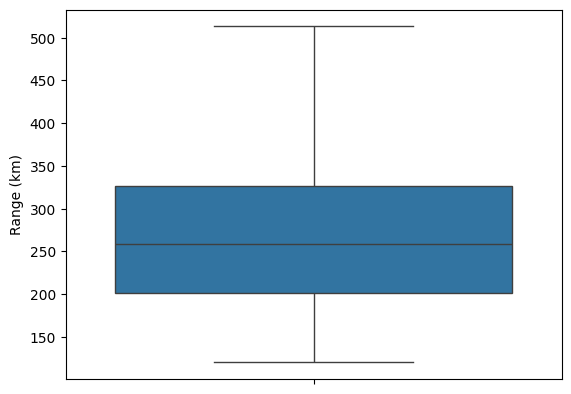

In [38]:
sns.boxplot(ds2['Range (km)'])

<Axes: xlabel='Range (km)', ylabel='Density'>

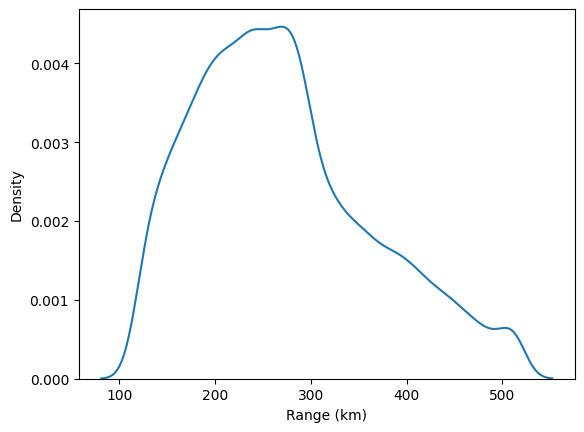

In [39]:
sns.kdeplot(ds2['Range (km)'])

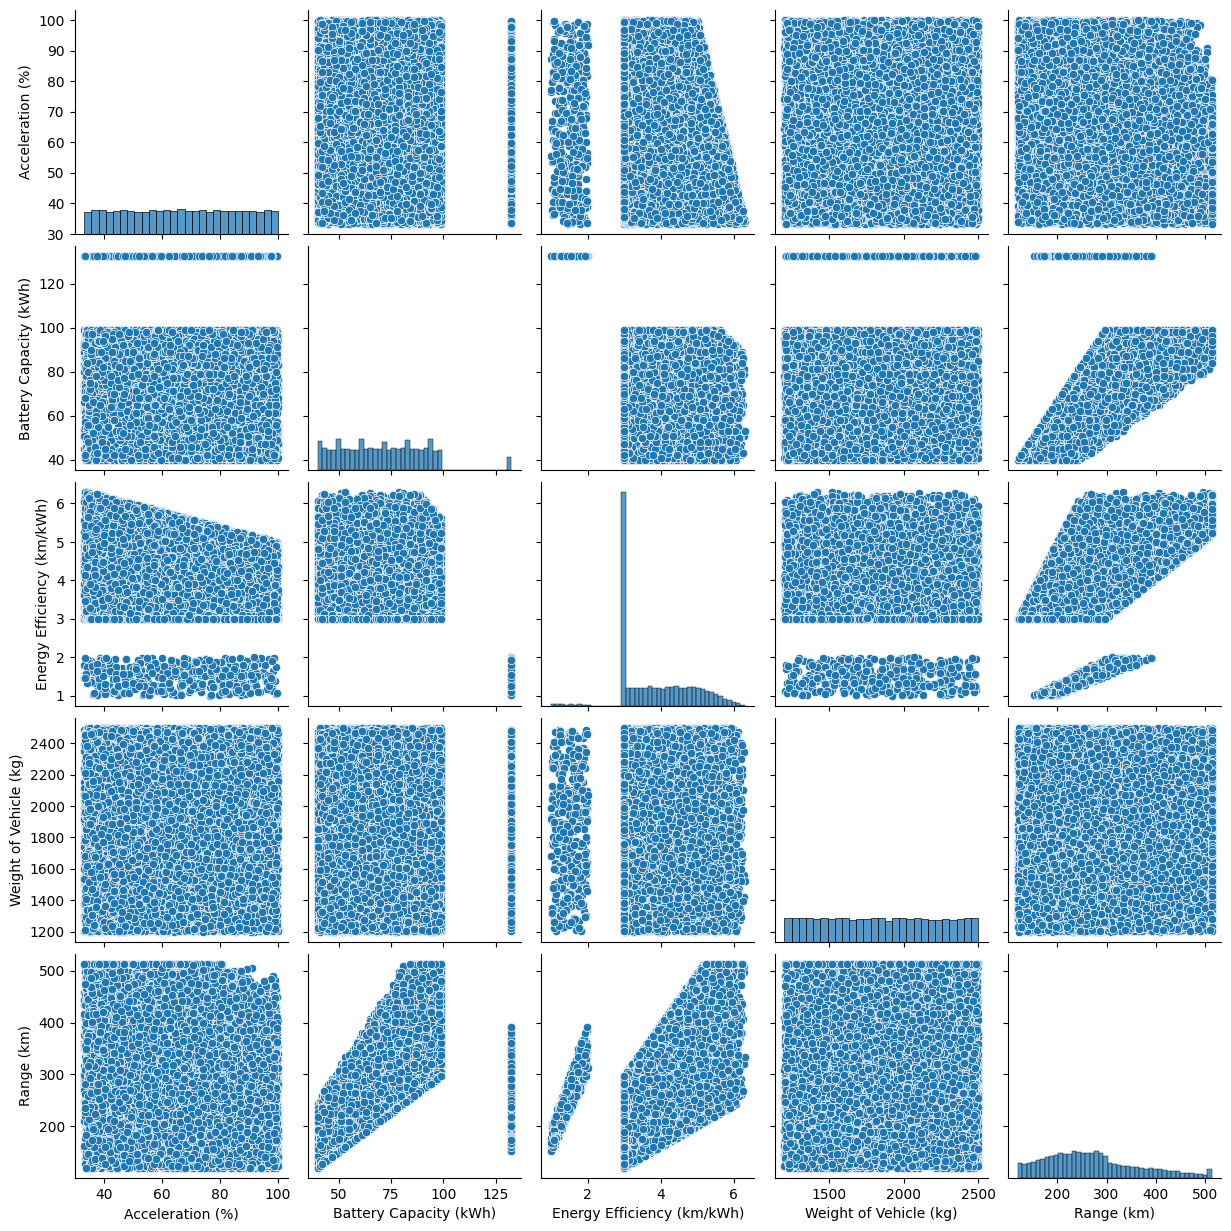

In [40]:
sns.pairplot(ds2)

<Axes: xlabel='Range (km)', ylabel='Density'>

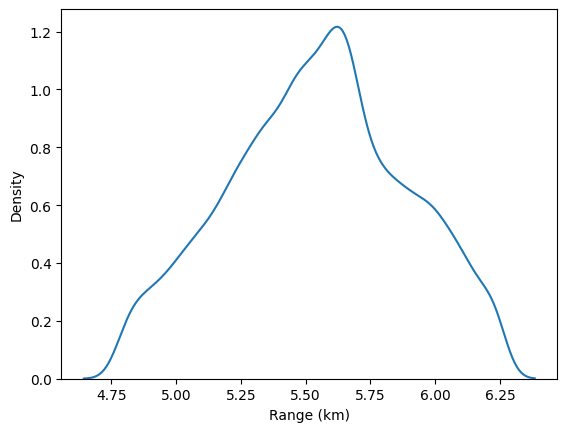

In [41]:
sns.kdeplot(np.log(ds2['Range (km)']))

In [42]:
ds2.corr()

,Acceleration (%),Battery Capacity (kWh),Energy Efficiency (km/kWh),Weight of Vehicle (kg),Range (km)
Acceleration (%),1.000000,0.012518,-0.263989,-0.001965,-0.177152
Battery Capacity (kWh),0.012518,1.000000,-0.153955,-0.003601,0.629705
Energy Efficiency (km/kWh),-0.263989,-0.153955,1.000000,-0.000703,0.643469
Weight of Vehicle (kg),-0.001965,-0.003601,-0.000703,1.000000,-0.003292
Range (km),-0.177152,0.629705,0.643469,-0.003292,1.000000


In [43]:
x = ds2.drop('Range (km)', axis=1)
y = ds2['Range (km)']

In [44]:
ds2.shape

(19537, 5)

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=20)
x_train

,Acceleration (%),Battery Capacity (kWh),Energy Efficiency (km/kWh),Weight of Vehicle (kg)
9267,63.95,52.0,3.00,2467
9270,87.42,41.0,4.42,1759
20119,46.61,52.0,5.07,2397
11012,33.62,92.0,3.47,2449
3754,84.54,82.0,3.00,1704
...,...,...,...,...
1642,84.40,41.0,3.00,2427
4002,53.10,61.0,3.00,1372
15196,98.84,56.0,3.00,1713
4469,51.16,60.0,5.80,2023


In [46]:
linear_reg = LinearRegression()
linear_reg

LinearRegression()

In [47]:
linear_reg.fit(x_train, y_train)

LinearRegression()

In [48]:
y_pred = linear_reg.predict(x_test)
y_pred

array([126.83455329, 305.23025475, 309.33567768, ..., 141.27040557,
       200.02545416, 326.9832851 ])

In [49]:
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error :', mse)

rmse = np.sqrt(mse)
print('Root Mean Squared Error :', rmse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error :', mae)

r_square = r2_score(y_test, y_pred)
print('R-Squared Value :', r_square)

adj_r2 = 1 - (((1- r_square)*(y_test.shape[0] - 1))/ (y_test.shape[0] - x_test.shape[1] - 1))
print('Adj-R-Squared Value :', adj_r2)

Mean Squared Error : 348.06849979241827
Root Mean Squared Error : 18.656594002990424
Mean Absolute Error : 13.007800766585284
R-Squared Value : 0.9601520148166844
Adj-R-Squared Value : 0.9601111765023792


In [50]:
def evaluation(string, model, ind_var, act):
    print(string.center(50, '*'))
    pred = model.predict(ind_var)

    mse = mean_squared_error(act, pred)
    print('Mean Squared Error :', mse)

    rmse = np.sqrt(mse)
    print('Root Mean Squared Error :', rmse)

    mae = mean_absolute_error(act, pred)
    print('Mean Absolute Error :', mae)

    r2_value = r2_score(act,pred)
    print('R-Squared Value:', r2_value)

In [51]:
evaluation('Train Data Evaluation', linear_reg, x_train, y_train)
print()
evaluation('Test Data Evaluation', linear_reg, x_test, y_test)

**************Train Data Evaluation***************
Mean Squared Error : 363.6929683324688
Root Mean Squared Error : 19.070735914811173
Mean Absolute Error : 13.08907116323208
R-Squared Value: 0.9577658631309485

***************Test Data Evaluation***************
Mean Squared Error : 348.06849979241827
Root Mean Squared Error : 18.656594002990424
Mean Absolute Error : 13.007800766585284
R-Squared Value: 0.9601520148166844


In [52]:
x_test.columns

Index(['Acceleration (%)', 'Battery Capacity (kWh)',
       'Energy Efficiency (km/kWh)', 'Weight of Vehicle (kg)'],
      dtype='object')

In [53]:
x_test.iloc[25]

Acceleration (%)                50.15
Battery Capacity (kWh)          83.00
Energy Efficiency (km/kWh)       4.85
Weight of Vehicle (kg)        2244.00
Name: 12459, dtype: float64

In [56]:
linear_reg.predict([x_test.iloc[100]])[0]

C:\Users\gurne\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(203.95800772869524)

In [89]:
test = {'Acceleration (%)':[40,50], 'Battery Capacity (kWh)':[100,85],
       'Energy Efficiency (km/kWh)':[3.2,4], 'Weight of Vehicle (kg)':[1350,1500]}

In [90]:
testx = pd.DataFrame.from_dict(test,orient='columns')

In [91]:
testx

,Acceleration (%),Battery Capacity (kWh),Energy Efficiency (km/kWh),Weight of Vehicle (kg)
0,40,100,3.2,1350
1,50,85,4.0,1500


In [92]:
linear_reg.predict(testx)

array([326.67994066, 331.60243303])

In [94]:
with open('linear_reg.pkl','wb') as f:
    pickle.dump(linear_reg,f)

In [95]:
with open('linear_reg.pkl', 'rb') as f:
    LR = pickle.load(f)


In [98]:
print(LR.predict(testx)[0])

326.67994065513244
